# Universal Classification Model

### Importing libraries and define functions

In [1]:
import pandas as pd
import numpy as np
import scipy
import math
import os
import sys

In [2]:
# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" # Also affect subprocesses

In [3]:
import sklearn
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

In [4]:
from pycaret.classification import *

In [5]:
import functions as f

### Loading the train data into the data frame.

In [6]:
data_train_df = pd.read_csv("output/datasets/universal/data_classification_train_df.csv", encoding="utf-8")

In [7]:
data_train_df.dtypes

NP_type                object
Coating                object
core_size_nm          float64
hydro_size_nm         float64
Surf_charge_mV        float64
Surface_area_m2_g     float64
shape                  object
Dose_microg_mL        float64
Duration_h            float64
Cell_name              object
Cell_species           object
cell_Organ             object
Cell_morphology        object
Cell_age               object
cell_type              object
sex                    object
Assay                  object
Test_indicator         object
nanomaterial_group     object
viability_class        object
dtype: object

In [8]:
data_train_df.shape

(9052, 20)

In [9]:
data_train_df.head()

,NP_type,Coating,core_size_nm,hydro_size_nm,Surf_charge_mV,Surface_area_m2_g,shape,Dose_microg_mL,Duration_h,Cell_name,Cell_species,cell_Organ,Cell_morphology,Cell_age,cell_type,sex,Assay,Test_indicator,nanomaterial_group,viability_class
0,CdTe,Ganciclovir,3.90,NaN,NaN,NaN,NaN,1.00,96.0,HeLa,Human,Cervix,Epithelial,Adult,cancer,female,MTT,TetrazoliumSalt,quantum_dots,Toxic
1,TiO2,None,10.00,1457.0,-11.0,NaN,NaN,10.00,NaN,BEAS_2B,Human,Lung,Epithelial,Adult,Normal,NaN,MTS,TetrazoliumSalt,meta_oxide,NonToxic
2,CdSe,None,2.77,NaN,NaN,NaN,NaN,9.04,100.0,T-Thermophila-BF5,Protozoa,Microorganism,Somatic,NaN,Normal,NaN,Others,NaN,quantum_dots,Toxic
3,Hydroxyapatite,None,20.00,NaN,-5.3,NaN,Rod,300.00,24.0,RAW 264.7,Mouse,Blood,Macrophage,Adult,cancer,male,CCK_8,TetrazoliumSalt,other,NonToxic
4,TiO2,None,5.00,NaN,NaN,NaN,Lentil,10.00,24.0,SH­SY5Y,Human,BoneMarrow,Epithelial,Young,cancer,female,MTT,TetrazoliumSalt,meta_oxide,NonToxic


In [10]:
#data_train_df_clean = data_train_df.dropna(thresh=data_train_df.shape[1]-3, axis=0)
#print(data_train_df_clean.shape)

### Loading the test data into the data frame.

In [11]:
data_test_df = pd.read_csv("output/datasets/universal/data_classification_test_df.csv", encoding="utf-8")

In [12]:
data_test_df.dtypes

NP_type                object
Coating                object
core_size_nm          float64
hydro_size_nm         float64
Surf_charge_mV        float64
Surface_area_m2_g     float64
shape                  object
Dose_microg_mL        float64
Duration_h            float64
Cell_name              object
Cell_species           object
cell_Organ             object
Cell_morphology        object
Cell_age               object
cell_type              object
sex                    object
Assay                  object
Test_indicator         object
nanomaterial_group     object
viability_class        object
dtype: object

In [13]:
data_test_df.shape

(2263, 20)

In [14]:
data_test_df.head()

,NP_type,Coating,core_size_nm,hydro_size_nm,Surf_charge_mV,Surface_area_m2_g,shape,Dose_microg_mL,Duration_h,Cell_name,Cell_species,cell_Organ,Cell_morphology,Cell_age,cell_type,sex,Assay,Test_indicator,nanomaterial_group,viability_class
0,Ni,None,65.17,NaN,NaN,NaN,Sphere,5.00,24.0,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,other,NonToxic
1,CdSe,Glycine,2.40,NaN,NaN,NaN,NaN,0.15,72.0,HeLa,Human,Cervix,Epithelial,Adult,cancer,female,WST-1,TetrazoliumSalt,quantum_dots,NonToxic
2,Dendrimer,None,49.20,NaN,-5.38,NaN,NaN,0.02,96.0,HaCat,Human,Skin,Keratinocyte,Adult,Normal,male,Alamar_Blue,AlamarBlue,other,NonToxic
3,PLGA,Poloxamer,112.00,NaN,-21.00,NaN,Sphere,5000.00,24.0,Calu-3,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,other,NonToxic
4,Pt,PVP,4.00,13.5,-8.00,NaN,NaN,0.00,48.0,IMR90,Human,Lung,Fibroblast,neonate,Normal,female,CellTiter_Glo,luciferase,other,NonToxic


In [15]:
#data_test_df_clean = data_test_df.dropna(thresh=data_test_df.shape[1]-3, axis=0)
#print(data_test_df_clean.shape)

### Use the best scenario identified in step 01

In [16]:
sc_ignore_features = ['nanomaterial_group', 'Coating', 'Cell_name']
sc_bin_numeric_features = None
sc_high_cardinality_features = None

sc_imputation_type = 'iterative'
sc_numeric_imputation = 'mean'

sc_normalize = True
sc_remove_outliers = True

### The Universal Classification Model: Data Preprcoessing

In [17]:
stup = setup(data = data_train_df, target = 'viability_class', 
              
        test_data = data_test_df,

        imputation_type = sc_imputation_type, 
        numeric_imputation = sc_numeric_imputation, #default: mean

        categorical_imputation = "constant", #default: constant
        iterative_imputation_iters = 5, #default: 5
        numeric_iterative_imputer = "lightgbm",
        categorical_iterative_imputer = "lightgbm",

        ignore_features = sc_ignore_features,
        bin_numeric_features = sc_bin_numeric_features,
        high_cardinality_features = sc_high_cardinality_features,

        high_cardinality_method = "frequency", #default: frequency
        handle_unknown_categorical = True, #default
        unknown_categorical_method = "least_frequent", #default

        normalize = sc_normalize, #default: False
        remove_outliers= sc_remove_outliers, #default: False

        outliers_threshold = 0.05, #default

        transformation= False, #default
        transformation_method = 'yeo-johnson', #default
        combine_rare_levels = False,
        rare_level_threshold = 0.1, #default: 0.1

        remove_multicollinearity = False, #default 
        multicollinearity_threshold = 0.9, #default

        ignore_low_variance = True, 

        feature_interaction = False, 
        feature_ratio = False,
        polynomial_features = False, 
        trigonometry_features = False,

        fix_imbalance = True,
        #fix_imbalance_method = SMOTE, # default
            
        # don't change the following
        session_id = 123,
        use_gpu=False,
        log_experiment = False,
        silent=True,
        experiment_name = 'universal')

set_config('seed', 123)

,Description,Value
0,session_id,123
1,Target,viability_class
2,Target Type,Binary
3,Label Encoded,"NonToxic: 0, Toxic: 1"
4,Original Data,"(9052, 20)"
5,Missing Values,True
6,Numeric Features,6
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [18]:
print(get_config(variable="X_train").shape)
print(get_config(variable="y_train").shape)

(8599, 190)
(8599,)


In [19]:
print(get_config(variable="X").shape)
print(get_config(variable="y").shape)

(9052, 190)
(9052,)


In [20]:
set_config('X_train', get_config(variable="X").copy()) 
set_config('y_train', get_config(variable="y").copy()) 

In [21]:
print(get_config(variable="X_train").shape)
print(get_config(variable="y_train").shape)

(9052, 190)
(9052,)


In [22]:
print(get_config(variable="X_test").shape)
print(get_config(variable="y_test").shape)

(2263, 190)
(2263,)


In [23]:
#load_config('output/models/universal_classification_rf.cfg')

In [24]:
data_train_transformed_df = get_config(variable="X").copy()
data_train_transformed_df['viability_class'] = get_config(variable="y").copy()

In [25]:
data_test_transformed_df = get_config(variable="X_test").copy()
data_test_transformed_df['viability_class'] = get_config(variable="y_test").copy()

In [26]:
data_train_transformed_df.to_csv('output/datasets/universal/transformed/data_classification_train_transformed_df.csv', encoding='utf-8', index=False)
data_test_transformed_df.to_csv('output/datasets/universal/transformed/data_classification_test_transformed_df.csv', encoding='utf-8', index=False)

### The Universal Classification Model Comparison

In [27]:
top_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8674,0.9061,0.6935,0.7167,0.7046,0.6192,0.6195,0.7530
xgboost,Extreme Gradient Boosting,0.8574,0.9052,0.7027,0.6813,0.6915,0.5988,0.5992,1.8440
et,Extra Trees Classifier,0.8573,0.8801,0.6527,0.7005,0.6756,0.5842,0.5850,0.9230
catboost,CatBoost Classifier,0.8542,0.9060,0.7090,0.6707,0.6889,0.5938,0.5945,13.7290
dt,Decision Tree Classifier,0.8479,0.8174,0.6692,0.6656,0.6672,0.5687,0.5688,0.2120
lightgbm,Light Gradient Boosting Machine,0.8449,0.8955,0.7007,0.6478,0.6728,0.5714,0.5725,0.2800
knn,K Neighbors Classifier,0.7842,0.8449,0.7231,0.5193,0.6043,0.4615,0.4736,0.5700
gbc,Gradient Boosting Classifier,0.7723,0.8290,0.6818,0.5006,0.5770,0.4263,0.4361,0.8230
dummy,Dummy Classifier,0.7722,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1560
ada,Ada Boost Classifier,0.7148,0.7841,0.6668,0.4207,0.5154,0.3278,0.3458,0.3470


In [28]:
results_df = pull()

results_df = results_df.reset_index(level=0)

results_df.to_csv("output/models_results/universal/" + "classification_model_comparison_results.tsv", 
                index=False, encoding="utf-8", sep="\t")

In [29]:
print(get_config(variable="X_test").shape)
print(get_config(variable="y_test").shape)

(2263, 190)
(2263,)


In [30]:
print(results_df.iloc[0,0])

rf


### 10-fold cross-validation of the best performing model

In [31]:
model = create_model(results_df.iloc[0,0])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8653,0.9024,0.7150,0.7014,0.7081,0.6206,0.6207
1,0.8687,0.9198,0.6860,0.7245,0.7047,0.6203,0.6207
2,0.8619,0.8960,0.6796,0.7035,0.6914,0.6024,0.6026
3,0.8829,0.9179,0.7379,0.7451,0.7415,0.6658,0.6658
4,0.8431,0.8983,0.6553,0.6553,0.6553,0.5538,0.5538
5,0.8796,0.9155,0.7136,0.7462,0.7295,0.6521,0.6524
6,0.8663,0.9094,0.6796,0.7179,0.6983,0.6125,0.6128
7,0.8785,0.9104,0.6748,0.7637,0.7165,0.6395,0.6415
8,0.8718,0.8986,0.6942,0.7296,0.7114,0.6291,0.6294


In [32]:
results_df = pull()

results_df = results_df.reset_index(level=0)

results_df.to_csv("output/models_results/universal/" + "classification_model_cross_validation_results.tsv", 
                index=False, encoding="utf-8", sep="\t")

In [33]:
print(get_config(variable="X_test").shape)
print(get_config(variable="y_test").shape)

(2263, 190)
(2263,)


### Finalize the model

In [34]:
final_model = finalize_model(model)

In [35]:
print(get_config(variable="X_test").shape)
print(get_config(variable="y_test").shape)

(2263, 190)
(2263,)


### Test the model on the test set

In [36]:
pred_test_set = predict_model(final_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8542,0.8960,0.6705,0.6838,0.6771,0.5829,0.5830


In [37]:
results_df = pull()

results_df = results_df.reset_index(level=0)

results_df.to_csv("output/models_results/universal/" + "classification_model_test_set_validation_results.tsv", 
                index=False, encoding="utf-8", sep="\t")

In [38]:
predict_model(final_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8542,0.8960,0.6705,0.6838,0.6771,0.5829,0.5830


,core_size_nm,hydro_size_nm,Surf_charge_mV,Surface_area_m2_g,Dose_microg_mL,Duration_h,NP_type_Ag,NP_type_Al2O3,NP_type_Au,NP_type_Bi,...,Test_indicator_TetrazoliumSalt,Test_indicator_Trypan_Blue,Test_indicator_fluorescent,Test_indicator_luciferase,Test_indicator_propidium_iodide,Test_indicator_resazurin/sulforhodamine_B,Test_indicator_toluylene red,viability_class,Label,Score
0,0.049636,-0.731554,-0.229281,-0.842579,-0.160654,-0.289517,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NonToxic,NonToxic,0.5600
1,-0.607179,0.426936,1.323223,0.149100,-0.170022,1.102041,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NonToxic,NonToxic,1.0000
2,-0.117471,0.145759,0.140565,-0.259325,-0.170273,1.797819,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NonToxic,NonToxic,1.0000
3,0.539657,-0.622027,-0.361327,-1.014511,9.486858,-0.289517,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NonToxic,NonToxic,0.9900
4,-0.590436,-1.217671,0.056380,-0.460637,-0.170311,0.406262,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NonToxic,NonToxic,0.9800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,-0.335851,-0.702942,-0.277786,-0.276591,-0.170118,-0.289517,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NonToxic,NonToxic,0.8817
2259,0.414091,-0.852281,-0.246542,-1.211935,-0.170311,0.406262,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NonToxic,NonToxic,0.9255
2260,-0.460685,-0.408265,0.001114,-0.609396,0.215975,-0.289517,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NonToxic,NonToxic,0.8600
2261,-0.590436,0.197751,1.207749,-0.005995,-0.168380,0.406262,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NonToxic,NonToxic,0.9533


### Inspect model plots

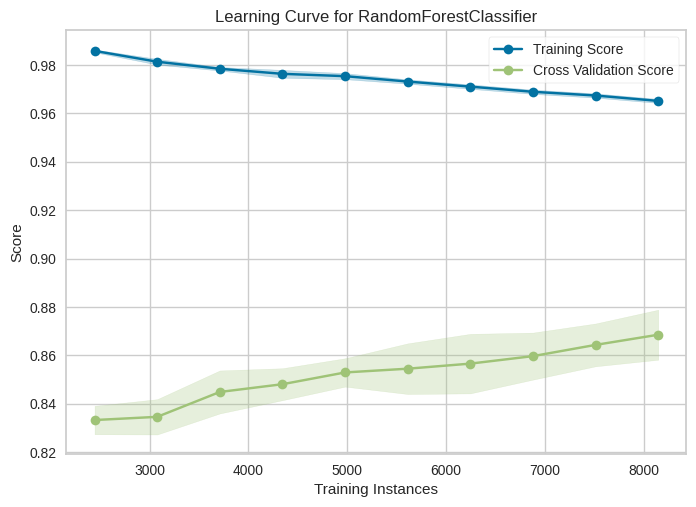

In [39]:
plot_model(final_model, plot = 'learning')

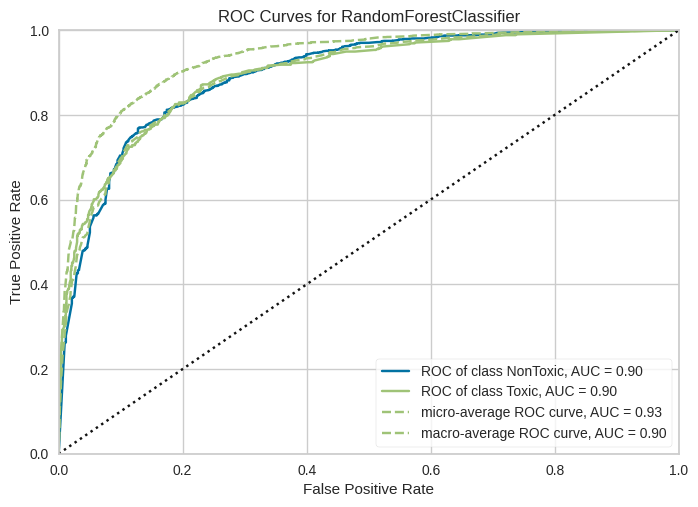

In [40]:
plot_model(final_model, plot = 'auc')

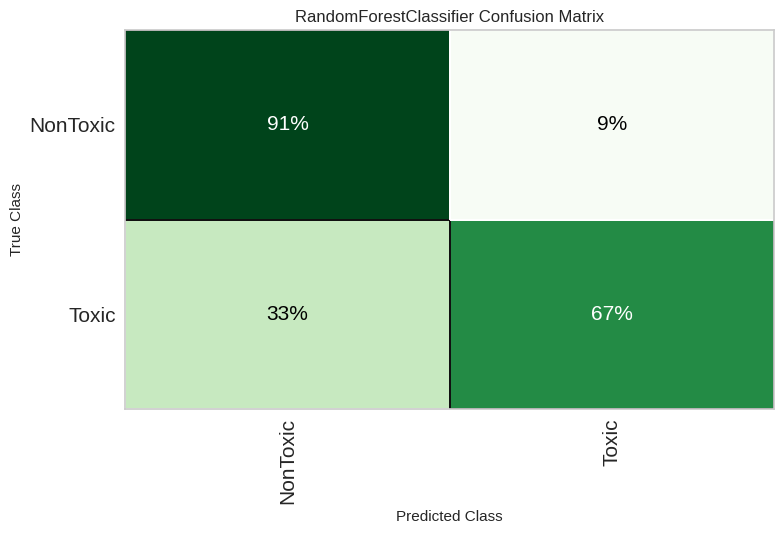

In [41]:
plot_model(final_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

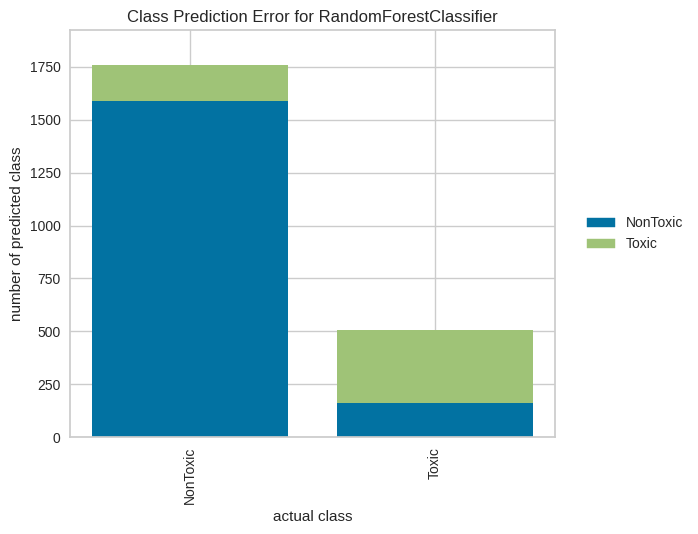

In [42]:
plot_model(final_model, plot = 'error')

### Feature importance plot

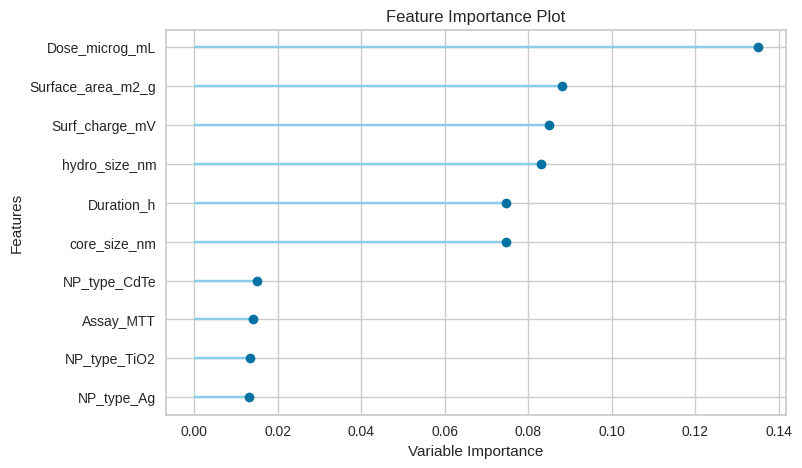

In [43]:
plot_model(final_model, plot = 'feature')

### Save the model to file

In [44]:
save_config('output/models/universal_classification_config.cfg')

In [45]:
save_model(final_model, 'output/models/universal_classification_model.mdl')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['nanomaterial_group',
                                                        'Coating', 'Cell_name'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='viability_class',
                                       time_features=[])),
                 ('imputer',
                  Iterative_Imputer(add_indicator=False,
                                    classifier=LGBMClassifier(boo...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=No